## 1. Background
The body fat percentage (BFP) of a human is the total mass of fat divided by total body mass, multiplied by 100. Body fat is a measure of obesity, plays an important role in various health outcomes such as life expectancy, prognosis for disease, healthcare costs, and the general well-being of individuals. Current measurement technique including underwater weighing, Whole-body air displacement plethysmography (ADP), Dual energy X-ray absorptiometry are usually inconvenient/costly. A simple, robust, accurate and precise  “rule-of-thumb” method to estimate percentage of body fat using clinically available measurements is in need. Our analysis and model is based on a real data set of 252 men with measurements of their percentage of body fat and various body circumference measurements.

## 2. Data Cleaning 

The first thing to check is whether there are any apparently wrong records. According to Siri's equation (BODYFAT=495/DENSITY-450), we draw a plot of BODYFAT vs. 1/DENSITY to find anomalies. The 182th, 96th, 76th and 48th records should be dropped since they don't comply with the equation and we can't decide if we should believe BODYFAT or DENSITY or neither. According to the BMI equation (BMI=Weight/Height^2), similarly, we draw a plot and find that No. 42, 163 and 221 are far away from the theoretical line. We correct their height using their weight and adiposity.

We then check whether there are any unusual values of the response (i.e. BODYFAT). Judged from the quartiles and the boxplot, there are two skeptical records (No. 172 and 216). Their bodyfat are 1.9$\%$ and 45.1$\%$. According to American Council on Exercise, the minimum bodyfat is about 2$\%$. 45.1$\%$ is a possible value based on our research. Therefore, we keep both of them. To detect outliers for explanatory variables, we adapt pairwise scatter plots. No. 39, 41 and 212 are always far away from the majority. We then use star plots to compare these three with the other records and decide to delete 39, 41 and keep 212.

Next, we fit a full linear regression model to make further inspection. Judged from the residual plots, there are no obvious outliers any more but No. 31 is an high influential observation judged from its cook's distance and leverage. After taking a close look at it, we find nothing's wrong about it, so we keep it.

Finally, we save the dataset after cleaning into the "cleanfile.csv" file.

# 2 Model Selection
Based on the preprocess result of data and rule of thumb, we plan to use a linear regression model. Considering the fact that the sample size is relatively small, a full model must include redundant variables, which leads to problems such as overfitting and collinearity. Also, it's common sense that users are more willing to use a simple model. Therefore, in this section, we use exhaustive model selection method to select variables under several criteria (AIC, BIC, Mallow's Cp and $\Delta R^2$). Then we use $k$-fold to choose the best model with least MSE (Mean Squared Error).

Note: In the following analysis, we suppose the largest number of features to be selected is 8. 
## 2.1 Possible models
By the help of <font style="font-family: courier">regsubset()</font> from the <font style="font-family: courier">leaps</font> package, we defined a function <font style="font-family: courier">my.regsub()</font> to record the best models for number of features from 1 to 8 and the corresponding values of different criteria. 

| Criteria | Model |
|:----------------|:-----------------------------------------------------------------------|
| AIC and $C_p$ | BODY~AGE+HEIGHT+NECK+CHEST+ABDOMEN+FOREARM+WRIST |  
| BIC | BODY~WEIGHT+ABDOMEN+WRIST | 

We also draw a plot of best models' $R^2$ against the number of features. We see that two or three variables have already explained the response's variation well enough. Adding more features doesn't bring significant increases to $R^2$ and meanwhile make the model more complex. In other words, there's a tradeoff between the accuracy and complexity of the model. By $\Delta R^2$ criteria, we decide to keep the first two models, 
  
  i.e.
BODY$\sim$WEIGHT+ABDOMEN+WRIST and BODY$\sim$WEIGHT+ABDOMEN

## 2.2 Cross Validation
We use k-fold cross validation to decide our final model. Here we choose k = 6 according to the reference. According to Jung (2017), he suggests one empirical choice where $K\approx\log n$ and $n/K>3d$ ($d$ is the number of features).

## 2.3 Final Model

In order to see the performance of each model, we use Root of Mean Squared Error(RMSE)$=\sqrt{\frac{1}{n} \sum_{i=1}^{n}\left(Y_{i}-\hat{Y}_{i}\right)^{2}}$. The RMSE of each model is shown below:

|Index| Model | RMSE |
|--|:----------------|:-----------------------------------------------------------------------|
|1|BODYFAT~WEIGHT+ABDOMEN|4.068086|
|2|BODYFAT~WEIGHT+ABDOMEN+WRIST|3.967418|
|3|BODYFAT~AGE+HEIGHT+NECK+CHEST+ABDOMEN+FOREARM+WRIST|3.946156|


We can see that the RMSE increases as the number of features decreases, but it doesn't change so much from model3 to model2: $\frac{3.967418-3.946156}{3.946156}=0.5\%$. Furthermore, we can see that in the third model there are 4 coefficients insignificant (under 90 $\%$ confidence level). Therefore, based on the rule of thumb, we finally choose WEIGHT, ABDOMEN and WRIST to be the explanatory variables.

A brief summary of the model is as follows:

* Overall significance: 

   To test H$_0:$ The coefficients are all significantly different from 0. F-statistic is 218.1 on 3 and 242 degree of freedom. The p value is almost 0. The model is significant.
   

* Brief summary of coefficients: 

| | Estimates|Standard Errors|t-statistics | p-value | 
|:--|:--|:---|:---|:----|
|(Intercept) |-24.395 |   6.331 | -3.853| 0|
|WEIGHT      | -0.084 |   0.022 |-3.759 |0|
|ABDOMEN |      0.888  |  0.051 | 17.271 |0|
|WRIST   |     -1.302|   0.404|  -3.221| 0|

* Goodness of fit:

  R$^2$: 0.73. The model is a good fit. 



# 3 Regression Diagnosis

## 3.1 Model assumptions

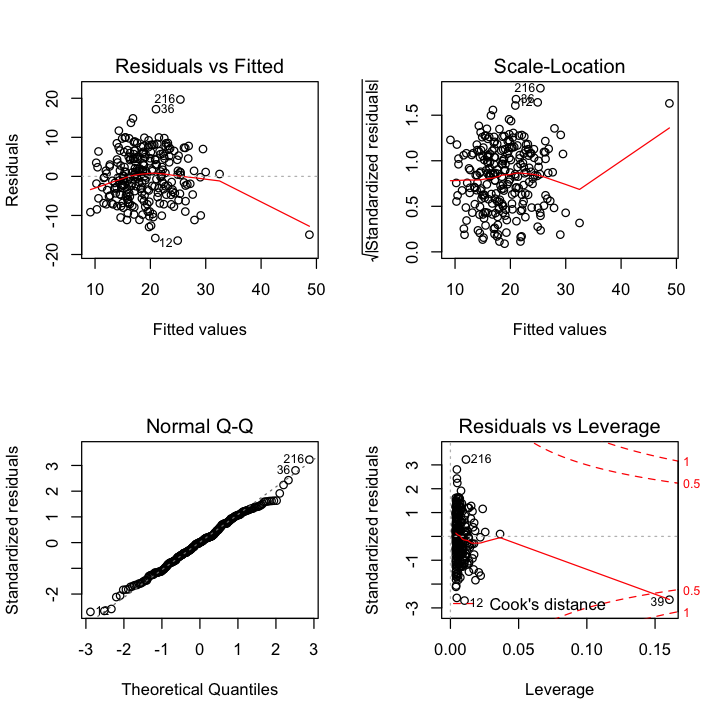

In [7]:
options(repr.plot.height=6,repr.plot.width=6)
bodyfat.dat=read.csv("data/cleanfile.csv")
par(mfcol=c(2,2))
plot(lm(BODYFAT~WEIGHT,data=bodyfat.dat))



* Independence: it holds since we assume data is collected on randomly chosen individuals.

* Linearity: No special patterns in the residual plots, so the assumption is reasonable.

* Normality: The assumption is roughly OK judged from the QQ-Plot. Furthermore, since the responses are positive, we can use boxcox to see whether we need a transformation. $\lambda=1$ is in the 95% confidence interval, so we don't need to do a transformation on y and the normality can be considered satisfied.

* Equal variance: It holds judged from the residual plots.

## 3.2 Outliers

There are no studentized residuals out of 1% quantile of a standard normal distribution, and furthermore no studentized residuals with Bonferroni p < 0.05. No outliers exist.

## 3.3  High leverage points
High leverage points are those with hat value greater than $2p/n$.

Observations with large hat values mean that their predictors are farther from the center but doesn't mean they are abnormal. We just have a look at these points, but won't delete them. Specifically:

* Point 9 has weight close to the 3rd quartile but abdomen lower than the 1st quantile. He must have a very strong body which we can also see from the bodyfat.

* Point 36 has weight close to the 1st quartile but abdomen higher than the 3rd quartile. He must have a very fat body which we can also see from the bodyfat.

* Points 12, 35, 146, 172, 198, 209, 235, 245 have high weights.

* Points 214, 219, 241 have low weights.

* Point 107 has weight and abdomen close to the mean, but wrist larger than the 3rd quartile.

* Point 243 has weight and wrist close to the mean, but abdomen larger than the 3rd quartile.

## 3.4 High influential points

No obvious such points since there are no points with cook's distance larger than 0.5. 
# 4 Interpretation of Model 
If you want to calculate you body fat percentage, you can multiply you weight(lbs)  with -0.08407, multiply your Abdomen 2 circumference (cm) with 0.88819, multiply your Wrist circumference (cm) with -1.30210, then add these three terms together and minus 24.39458.
# 5 Summary
We use a linear regression to predict the bodyfat where predictors includes Weight, Abdomen, Wrist.

Pros: Our model is simple, easy to understand and applied. We sampled 20% of the data as the test set, the standard error of prediction is smaller using our model campared to using the method described in "Army Regulation 600-9 - The Army Body Composition Program".

Cons: Our training data is from the 252 men aged 22-81, so the model may not be applicable to women or children.

# Contribution:
Data Cleaning: Jingwen Yan, Runfeng Yong, Chenghui Li
Variable Selection: Jingwen Yan, Wenbo Fei
Regression Diagnosis: Wenbo Fei
Shiny App: Chenghui Li
Comparison with online Calculator: Runfeng Yong
# Reference:
1. Jung, Y., 2017. Multiple predicting K-fold cross-validation for model selection. Journal of Nonparametric Statistics, pp.1-19
2. https://www.uspharmacist.com/article/belly-fat-in-men
3. https://www.acefitness.org/education-and-resources/lifestyle/blog/112/what-are-the-guidelines-for-percentage-of-body-fat-loss
4. https://www.army.mil/e2/downloads/rv7/r2/policydocs/r600_9.pdf